# Export data

In [84]:
# Numerical and Data Manipulation Imports
import numpy as np
import pandas as pd

# Data Visualization Imports
import matplotlib.animation as FuncAnimation
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

# Plotly Imports
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'

# Scikit-learn Imports
from sklearn import metrics
from sklearn.cluster import DBSCAN, KMeans
from sklearn.covariance import EllipticEnvelope, EmpiricalCovariance, MinCovDet
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from skfeature.function.similarity_based import fisher_score
from sklearn.impute import KNNImputer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.tree import plot_tree

# Statistical Imports
import scipy.stats as stats
from scipy.stats import shapiro

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [85]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cardiotocography = fetch_ucirepo(id=193) 

In [86]:
X1 = cardiotocography.data.features 
y1 = cardiotocography.data.targets 
df_x = pd.DataFrame(X1)
df_y = pd.DataFrame(y1)
df_cardio = pd.concat([df_x, df_y], axis=1)

In [87]:
# df = pd.read_csv(r"D:\USTH\Nam Ba\Fund DS\spectf+heart\SPECTF.train", header=None)
# df = df.drop(['pox', 'erl'], axis = 1) # drop because pox has very little significance. Most values = 0

In [88]:
df = pd.read_csv('cardio.csv')

In [89]:
numerical_features = []
categorical_features = []
date_features = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numerical_features.append(col)
    elif df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        date_features.append(col)

In [90]:
print(numerical_features)
print(categorical_features)
print(date_features)

['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'CLASS', 'NSP']
[]
[]


In [91]:
df[numerical_features].describe()

LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.303857     0.003178     0.009481     0.004366     0.001889   
std       9.840844     0.003866     0.046666     0.002946     0.002960   
min     106.000000     0.000000     0.000000     0.000000     0.000000   
25%     126.000000     0.000000     0.000000     0.002000     0.000000   
50%     133.000000     0.002000     0.000000     0.004000     0.000000   
75%     140.000000     0.006000     0.003000     0.007000     0.003000   
max     160.000000     0.019000     0.481000     0.015000     0.015000   

                DS           DP         ASTV         MSTV        ALTV  ...  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.00000  ...   
mean      0.000003     0.000159    46.990122     1.332785     9.84666  ...   
std       0.000057     0.000590    17.192814     0.883241    18.39688  ...   
min       0.000000     0.000000    12.000000     0.200000     0.00000  ...   
25%       0.000000     0.000000    32.000000     0.700000     0.00000  ...   
50%       0.000000     0.000000    49.000000     1.200000     0.00000  ...   
75%       0.000000     0.000000    61.000000     1.700000    11.00000  ...   
max       0.001000     0.005000    87.000000     7.000000    91.00000  ...   

               Max         Nmax       Nzeros         Mode         Mean  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    164.025400     4.068203     0.323612   137.452023   134.610536   
std      17.944183     2.949386     0.706059    16.381289    15.593596   
min     122.000000     0.000000     0.000000    60.000000    73.000000   
25%     152.000000     2.000000     0.000000   129.000000   125.000000   
50%     162.000000     3.000000     0.000000   139.000000   136.000000   
75%     174.000000     6.000000     0.000000   148.000000   145.000000   
max     238.000000    18.000000    10.000000   187.000000   182.000000   

            Median     Variance     Tendency        CLASS          NSP  
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000  
mean    138.090310    18.808090     0.320320     4.509878     1.304327  
std      14.466589    28.977636     0.610829     3.026883     0.614377  
min      77.000000     0.000000    -1.000000     1.000000     1.000000  
25%     129.000000     2.000000     0.000000     2.000000     1.000000  
50%     139.000000     7.000000     0.000000     4.000000     1.000000  
75%     148.000000    24.000000     1.000000     7.000000     1.000000  
max     186.000000   269.000000     1.000000    10.000000     3.000000  

[8 rows x 23 columns]

In [92]:
x = np.array(df.drop(['NSP', 'CLASS'], axis=1))
y = np.array(df['NSP'])
score = fisher_score.fisher_score(x, y, mode='rank')
print(score)

features = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 
            'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']
range_indices = np.arange(1, len(features)+1, 1)
features_num = {feature: index for feature, index in zip(features, range_indices)}
print(features_num)

[14 11 13  3  4  2 19  1 20 12 17  8 10 16  9  0 15  6 18  7  5]
{'LB': 1, 'AC': 2, 'FM': 3, 'UC': 4, 'DL': 5, 'DS': 6, 'DP': 7, 'ASTV': 8, 'MSTV': 9, 'ALTV': 10, 'MLTV': 11, 'Width': 12, 'Min': 13, 'Max': 14, 'Nmax': 15, 'Nzeros': 16, 'Mode': 17, 'Mean': 18, 'Median': 19, 'Variance': 20, 'Tendency': 21}


In [93]:
reverse_features_num = {index: feature for feature, index in features_num.items()}
for s in score:
    if s in reverse_features_num:
        print(f"Score {s} corresponds to feature: {reverse_features_num[s]}")

Score 14 corresponds to feature: Max
Score 11 corresponds to feature: MLTV
Score 13 corresponds to feature: Min
Score 3 corresponds to feature: FM
Score 4 corresponds to feature: UC
Score 2 corresponds to feature: AC
Score 19 corresponds to feature: Median
Score 1 corresponds to feature: LB
Score 20 corresponds to feature: Variance
Score 12 corresponds to feature: Width
Score 17 corresponds to feature: Mode
Score 8 corresponds to feature: ASTV
Score 10 corresponds to feature: ALTV
Score 16 corresponds to feature: Nzeros
Score 9 corresponds to feature: MSTV
Score 15 corresponds to feature: Nmax
Score 6 corresponds to feature: DS
Score 18 corresponds to feature: Mean
Score 7 corresponds to feature: DP
Score 5 corresponds to feature: DL


In [94]:
df = df.drop(['Mode', 'ASTV', 'ALTV', 'Nzeros', 'MSTV', 'Nmax', 'DS', 'Mean', 'DP', 'DL', 'NSP', 'CLASS'], axis=1)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# EDA


### Target's distribution

In [95]:
# #color_discrete_sequence_brown = ['#8B4513', '#A0522D', '#D2B48C', '#F4A460', '#DEB887', '#BC8F8F', '#F5DEB3']
# color_discrete_sequence_brown = ['#4E3B31', '#A0522D', '#D2B48C', '#8B4513', '#C19A6B', '#D2691E', '#F5DEB3', '#8B5A2B', '#A52A2A', '#D8BFD8']
# color_discrete_sequence_pink = ['#29066B', '#7D3AC1', '#EB548C', '#B18FDE', '#6A1E9C', '#F27D9A', '#7A4E96', '#D56AA0', '#9C40A4', '#F0A0B0']

In [96]:
# fig = px.pie(df, 'localization_site',color_discrete_sequence=color_discrete_sequence_brown,title='Label Distribution',template='plotly')

# fig.show()

In [97]:
# ## Overall dist
# fig = px.box(df[numerical_features], title="Boxplot of Numerical Features",
#              labels={'variable': 'Features', 'value': 'Values'},
#              color_discrete_sequence=['#C19A6B'])
# fig.update_layout({
#     'plot_bgcolor': 'white',
#     'paper_bgcolor': 'white',
#     'font': {'size': 16}
# })

# fig.update_layout(title_font_size=20)

# fig.update_xaxes(title_font_size=18)
# fig.update_yaxes(title_font_size=18)

# fig.show()


In [98]:
# colors = ['#4E3B31', '#A0522D', '#D2B48C', '#8B4513', '#C19A6B', '#D2691E', '#F5DEB3', '#8B5A2B', '#A52A2A', '#D8BFD8']

# fig = px.histogram(df[numerical_features].melt(var_name='Features', value_name='Values'), x='Values', color='Features',
#                    color_discrete_map={feature: color for feature, color in zip(df.columns, colors)},
#                    title="Histogram of Numerical Features")

# fig.update_layout({
#     'plot_bgcolor': 'white',
#     'paper_bgcolor': 'white',
#     'font': {'size': 16}
    
# })

# fig.update_layout(title_font_size=20)

# fig.update_xaxes(title_font_size=18)
# fig.update_yaxes(title_font_size=18)

# fig.show()


### mcg's distribution

In [99]:
# fig = px.box(data_frame=df, x='localization_site',y='mcg',color='localization_site',color_discrete_sequence=color_discrete_sequence_brown,orientation='v')
# fig.show()

In [100]:
# fig = px.histogram(data_frame=df, x='mcg',color='localization_site',color_discrete_sequence=color_discrete_sequence_brown,nbins=50)
# fig.show()

### gvh's distribution

In [101]:
# fig = px.box(data_frame=df, x='localization_site',y='gvh',color='localization_site',color_discrete_sequence=color_discrete_sequence_brown,orientation='v')
# fig.show()

In [102]:
# fig = px.histogram(data_frame=df, x='gvh',color='localization_site',color_discrete_sequence=color_discrete_sequence_brown,nbins=50)
# fig.show()

### alm's distribution

In [103]:
# fig = px.box(data_frame=df, x='localization_site',y='alm',color='localization_site',color_discrete_sequence=color_discrete_sequence_brown,orientation='v')
# fig.show()

In [104]:
# fig = px.histogram(data_frame=df, x='alm',color='localization_site',color_discrete_sequence=color_discrete_sequence_brown,nbins=50)
# fig.show()

### mit's distribution

In [105]:
# fig = px.box(data_frame=df, x='localization_site',y='mit',color='localization_site',color_discrete_sequence=color_discrete_sequence_brown,orientation='v')
# fig.show()

In [106]:
# fig = px.histogram(data_frame=df, x='mit',color='localization_site',color_discrete_sequence=color_discrete_sequence_brown,nbins=50)
# fig.show()

### vac's distribution


In [107]:
# #fig = px.box(data_frame=df, x='localization_site',y='vac',color='localization_site',color_discrete_sequence=['#29066B', '#7D3AC1', '#EB548C', '#B18FDE', '#6A1E9C', '#F27D9A', '#7A4E96', '#D56AA0', '#9C40A4', '#F0A0B0'],orientation='v')
# fig = px.box(data_frame=df, x='localization_site',y='vac',color='localization_site',color_discrete_sequence= color_discrete_sequence_brown,orientation='v')
# fig.show()

In [108]:
# # fig = px.histogram(data_frame=df, x='vac',color='localization_site',color_discrete_sequence=['#29066B', '#7D3AC1', '#EB548C', '#B18FDE', '#6A1E9C', '#F27D9A', '#7A4E96', '#D56AA0', '#9C40A4', '#F0A0B0'],nbins=50)
# fig = px.histogram(data_frame=df, x='vac',color='localization_site',color_discrete_sequence = color_discrete_sequence_brown,nbins=50)
# fig.show()

### nuc's distribution

In [109]:
# fig = px.box(data_frame=df, x='localization_site',y='nuc',color='localization_site',color_discrete_sequence=color_discrete_sequence_brown,orientation='v')
# fig.show()

In [110]:
# fig = px.histogram(data_frame=df, x='nuc',color='localization_site',color_discrete_sequence=color_discrete_sequence_brown,nbins=50)
# fig.show()

### Correlation heatmap

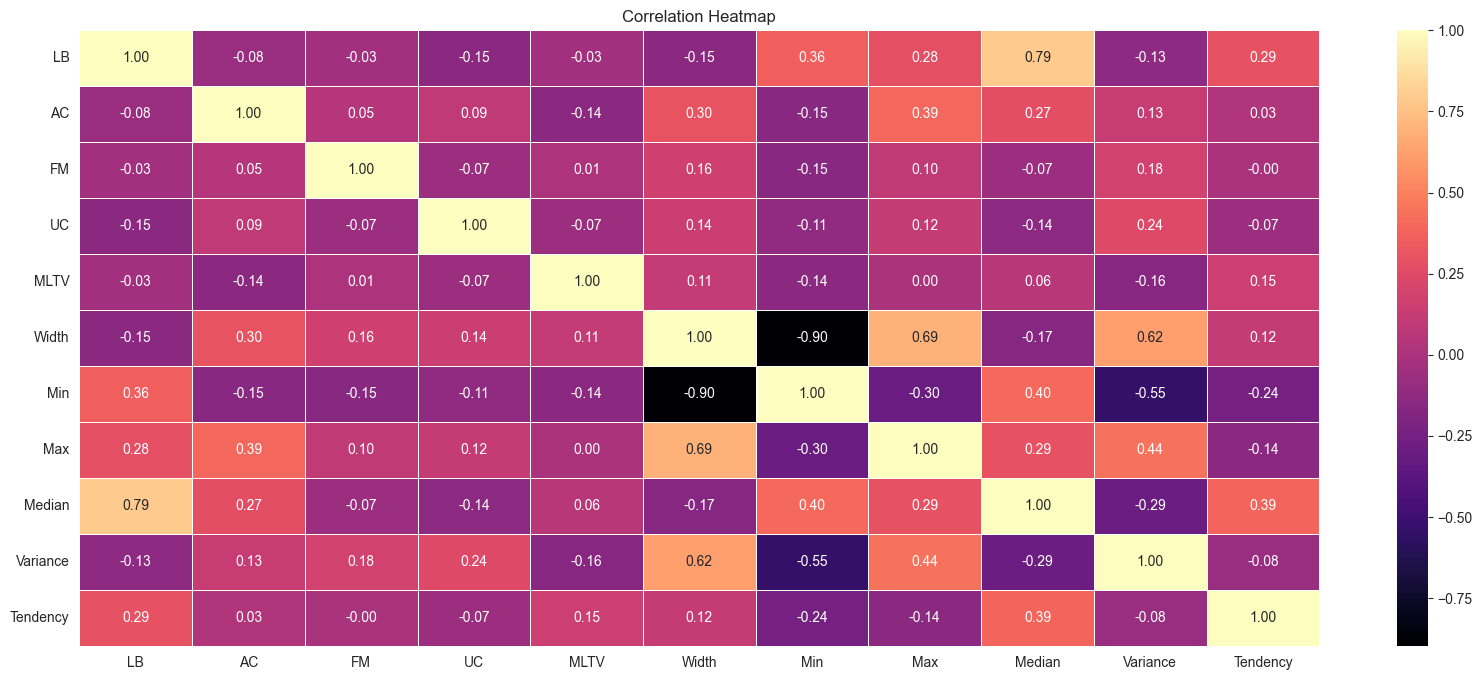

In [111]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='magma',
            fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Feature vectors are mostly independent of eachother, save for gvh and mcg.

# Feature Engineering


### Imputing Missing Values

In [112]:
knn_imputer = KNNImputer(n_neighbors=5)
for col in df:
    if df[col].isnull().any:
        df[[col]] = knn_imputer.fit_transform(df[[col]])

print(f'There are {df.isnull().sum().sum()} missing values in the dataset.')

There are 0 missing values in the dataset.


### Normality check

In [113]:
for feature in df:
    stat, p_value = shapiro(df)
    if p_value < 0.05 or pd.isna(p_value):
        print(f"{feature} is NOT normally distributed with p-value = {p_value}.")
    else:
        print(f"{feature} is normally distributed with p-value = {p_value}.")

LB is NOT normally distributed with p-value = 5.7196044325153066e-98.
AC is NOT normally distributed with p-value = 5.7196044325153066e-98.
FM is NOT normally distributed with p-value = 5.7196044325153066e-98.
UC is NOT normally distributed with p-value = 5.7196044325153066e-98.
MLTV is NOT normally distributed with p-value = 5.7196044325153066e-98.
Width is NOT normally distributed with p-value = 5.7196044325153066e-98.
Min is NOT normally distributed with p-value = 5.7196044325153066e-98.
Max is NOT normally distributed with p-value = 5.7196044325153066e-98.
Median is NOT normally distributed with p-value = 5.7196044325153066e-98.
Variance is NOT normally distributed with p-value = 5.7196044325153066e-98.
Tendency is NOT normally distributed with p-value = 5.7196044325153066e-98.


### Scaling the features

In [114]:
df

LB     AC     FM     UC  MLTV  Width    Min    Max  Median  Variance  \
0     120.0  0.000  0.000  0.000   2.4   64.0   62.0  126.0   121.0      73.0   
1     132.0  0.006  0.000  0.006  10.4  130.0   68.0  198.0   140.0      12.0   
2     133.0  0.003  0.000  0.008  13.4  130.0   68.0  198.0   138.0      13.0   
3     134.0  0.003  0.000  0.008  23.0  117.0   53.0  170.0   137.0      13.0   
4     132.0  0.007  0.000  0.008  19.9  117.0   53.0  170.0   138.0      11.0   
...     ...    ...    ...    ...   ...    ...    ...    ...     ...       ...   
2121  140.0  0.000  0.000  0.007   7.2   40.0  137.0  177.0   152.0       2.0   
2122  140.0  0.001  0.000  0.007   7.1   66.0  103.0  169.0   151.0       3.0   
2123  140.0  0.001  0.000  0.007   6.1   67.0  103.0  170.0   152.0       4.0   
2124  140.0  0.001  0.000  0.006   7.0   66.0  103.0  169.0   151.0       4.0   
2125  142.0  0.002  0.002  0.008   5.0   42.0  117.0  159.0   145.0       1.0   

      Tendency  
0          1.0  
1          0.0  
2          0.0  
3          1.0  
4          1.0  
...        ...  
2121       0.0  
2122       1.0  
2123       1.0  
2124       1.0  
2125       0.0  

[2126 rows x 11 columns]

In [115]:
x = df
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

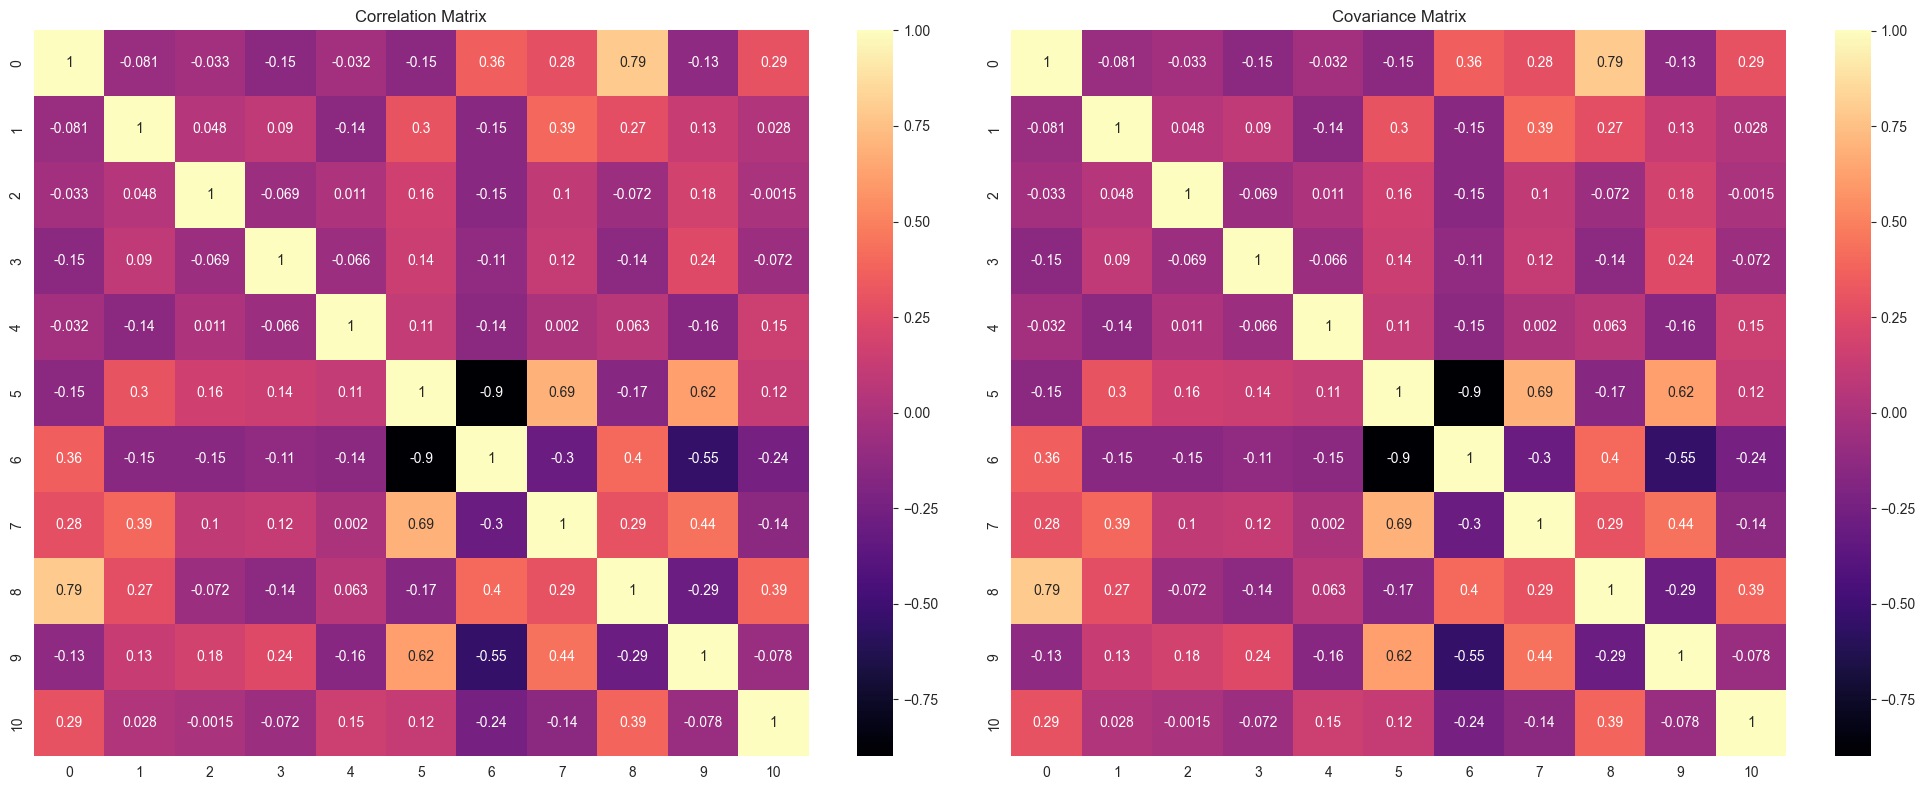

In [116]:
x_scaled_df = pd.DataFrame(x_scaled)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)  
correlation_matrix = x_scaled_df.corr()
sns.heatmap(data=correlation_matrix, cmap='magma', annot=True)
plt.title("Correlation Matrix")

plt.subplot(1, 2, 2)  
covariance_matrix = x_scaled_df.cov()
sns.heatmap(data=covariance_matrix, cmap='magma', annot=True)
plt.title("Covariance Matrix")

plt.tight_layout()  
plt.show()

In [117]:
for feature in x_scaled_df.columns:  
    stat, p_value = shapiro(x_scaled_df[feature]) 
    if p_value < 0.05 or pd.isna(p_value):
        print(f"{feature} is NOT normally distributed with p-value = {p_value}.")
    else:
        print(f"{feature} is normally distributed with p-value = {p_value}.")

0 is NOT normally distributed with p-value = 2.2100653284403134e-07.
1 is NOT normally distributed with p-value = 2.120508385203256e-44.
2 is NOT normally distributed with p-value = 5.3231795416291506e-70.
3 is NOT normally distributed with p-value = 1.0520106556093914e-24.
4 is NOT normally distributed with p-value = 8.4530987873867e-32.
5 is NOT normally distributed with p-value = 3.5790831627793626e-23.
6 is NOT normally distributed with p-value = 1.4856641484541566e-28.
7 is NOT normally distributed with p-value = 1.6901097393095494e-17.
8 is NOT normally distributed with p-value = 2.0515536349355242e-13.
9 is NOT normally distributed with p-value = 7.084677406270804e-55.
10 is NOT normally distributed with p-value = 1.6702579596457368e-48.


In [118]:
# # Data
# variables = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
# p_values = [2.845158019075413e-15, 5.465917147589199e-10, 3.616281999420032e-18,
#             7.223436837612678e-33, 1.0924661329418623e-64, 1.2398139794236964e-64,
#             7.384351989247584e-33, 1.9565984965725692e-45]

# # Plot
# plt.figure(figsize=(10, 6))
# bars = plt.bar(variables, p_values, color='#c8b290')
# plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (α = 0.05)')
# plt.yscale('log')  # Using a logarithmic scale for better visualization
# plt.xlabel('Variables')
# plt.ylabel('P-value')
# plt.title('Shapiro-Wilk Test')

# for bar, value in zip(bars, p_values):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2e}', 
#              ha='center', va='bottom')  # Adjusting position of the text
    

# plt.legend()
# plt.grid(alpha = .3)
# plt.tight_layout()
# plt.show()


### PCA transformation

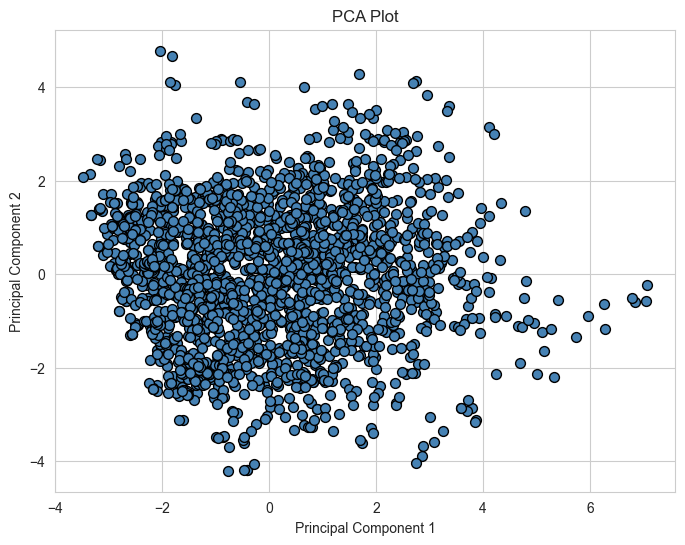

In [119]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled_df)
new_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
plt.scatter(new_df['PC1'], new_df['PC2'], c='steelblue', edgecolor='k', s=50)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [120]:
cumulative_explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
print(cumulative_explained_variance_ratio)
new_df.to_csv('new_df.csv', index=False)

[0.28269878 0.48314569]


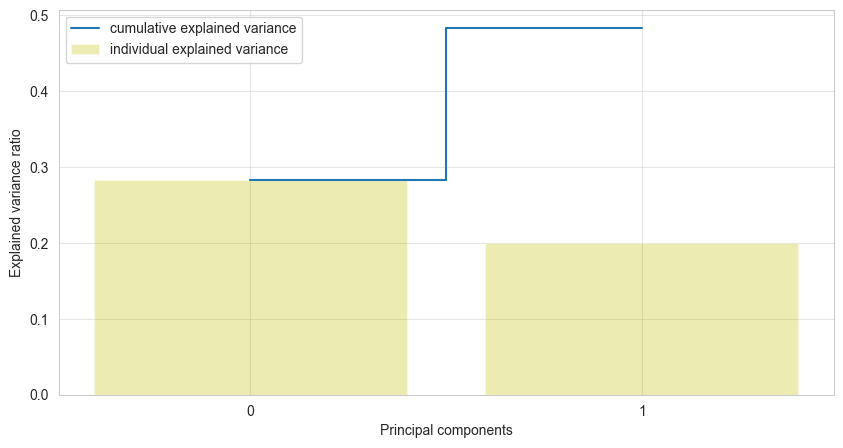

In [121]:
evr = pca.explained_variance_ratio_
cevr = evr.cumsum()
plt.figure(figsize=(10, 5))
plt.bar(range(len(evr)), evr, alpha=0.3, align='center', label='individual explained variance', color = 'y')
plt.step(range(len(cevr)), cevr, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks([0, 1])
plt.legend(loc='best')
plt.grid(alpha = .5)
plt.show()

In [122]:
print(cevr)

[0.28269878 0.48314569]


###  Covariance matrix estimation and comparison

Covariance matrix of new_df:
MCD (Robust):
[[2.73351492 0.12013713]
 [0.12013713 1.91711921]]
MLE:
[[3.10968657e+00 5.68166816e-16]
 [5.68166816e-16 2.20491607e+00]]


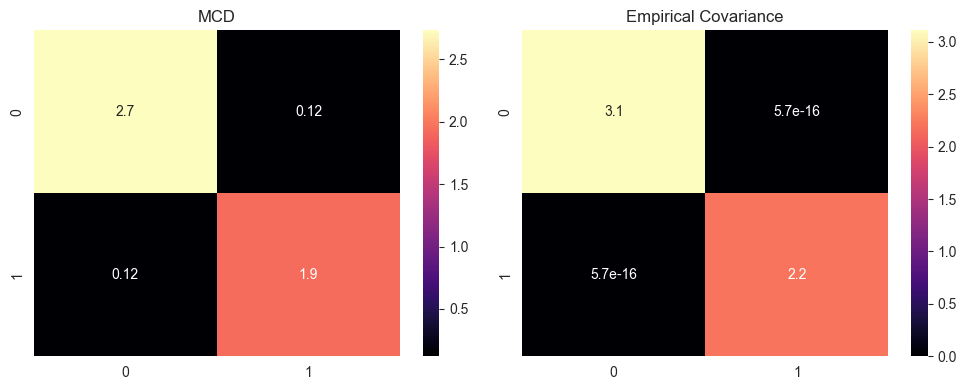

In [123]:
robust_cov = MinCovDet().fit(new_df)
empirical_cov = EmpiricalCovariance().fit(new_df)
print(f"Covariance matrix of new_df:\nMCD (Robust):\n{robust_cov.covariance_}\nMLE:\n{empirical_cov.covariance_}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  
correlation_matrix = new_df.corr()
sns.heatmap(data=robust_cov.covariance_, cmap='magma', annot=True)
plt.title("MCD")

plt.subplot(1, 2, 2)  
covariance_matrix = new_df.cov()
sns.heatmap(data=empirical_cov.covariance_, cmap='magma', annot=True)
plt.title("Empirical Covariance")

plt.tight_layout()  
plt.show()

Text(0.5, 1.0, "Scatter Plot of PCA's Feature")

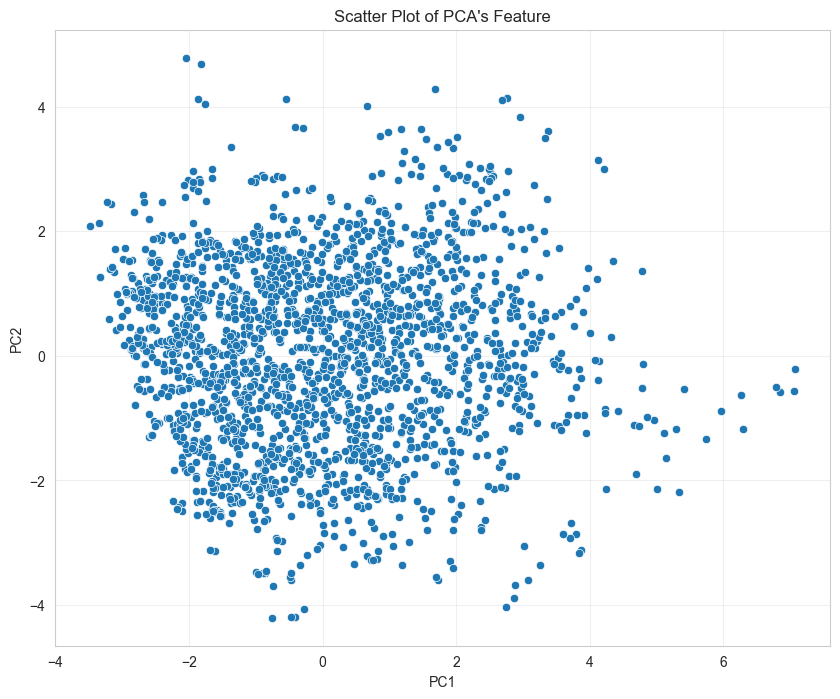

In [124]:
plt.figure(figsize = (10, 8))
plt.grid(alpha = .3)
sns.scatterplot(x=new_df['PC1'], y=new_df['PC2'], edgecolor = 'w')
plt.title("Scatter Plot of PCA's Feature")

## Outlier Detection

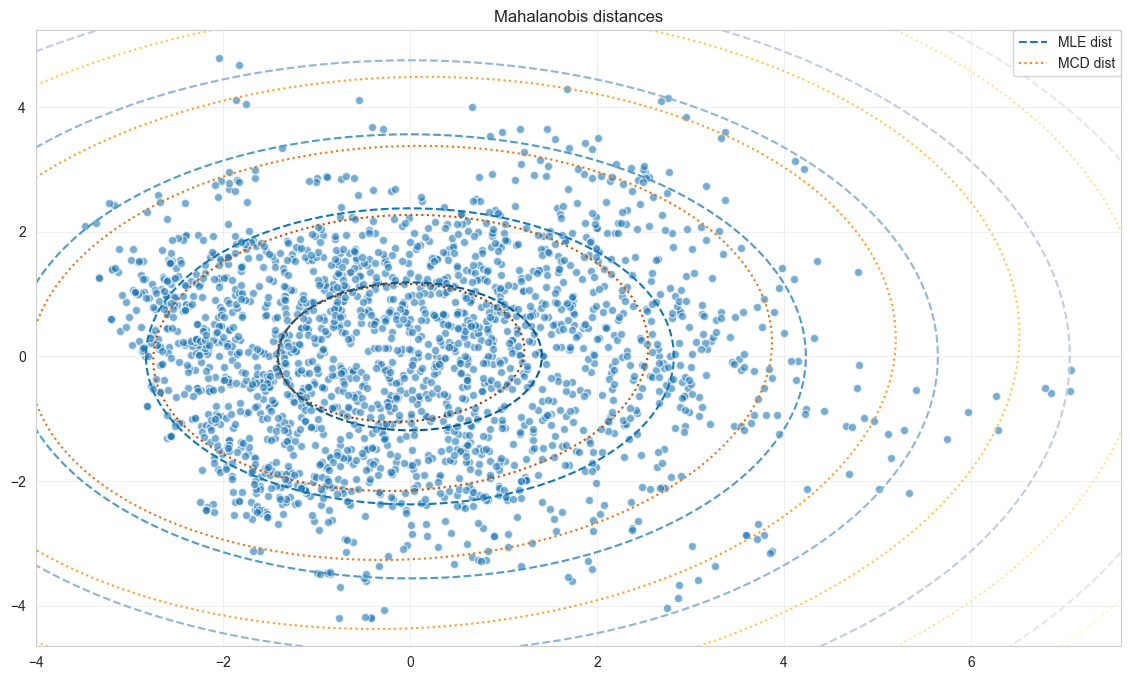

In [125]:
n_outliers = 100
rng = np.random.RandomState(0)
outliers = rng.uniform(low=-6, high=6, size=(n_outliers, 2))
outliers_df = pd.DataFrame(outliers, columns=new_df.columns)
#new_df = pd.concat([new_df, outliers_df], ignore_index=True)

fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(new_df.iloc[:, 0], new_df.iloc[:, 1],  edgecolors = 'w', alpha = .6)
#outlier_plot = ax.scatter(new_df.iloc[-n_outliers:, 0], new_df.iloc[-n_outliers:, 1], color="red", label="outliers")

ax.set_title("Mahalanobis distances")

xx, yy = np.meshgrid(
    np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
    np.linspace(plt.ylim()[0], plt.ylim()[1], 100),
)
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = empirical_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = plt.contour(
    xx, yy, np.sqrt(mahal_emp_cov), cmap=plt.cm.PuBu_r, linestyles="dashed"
)
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(
    xx, yy, np.sqrt(mahal_robust_cov), cmap=plt.cm.YlOrBr_r, linestyles="dotted"
)

ax.legend(
    [
        mlines.Line2D([], [], color="tab:blue", linestyle="dashed"),
        mlines.Line2D([], [], color="tab:orange", linestyle="dotted"),
    ],
    ["MLE dist", "MCD dist"],
    loc="upper right",
    borderaxespad=0,
)
ax.grid(alpha=0.3)
plt.show()

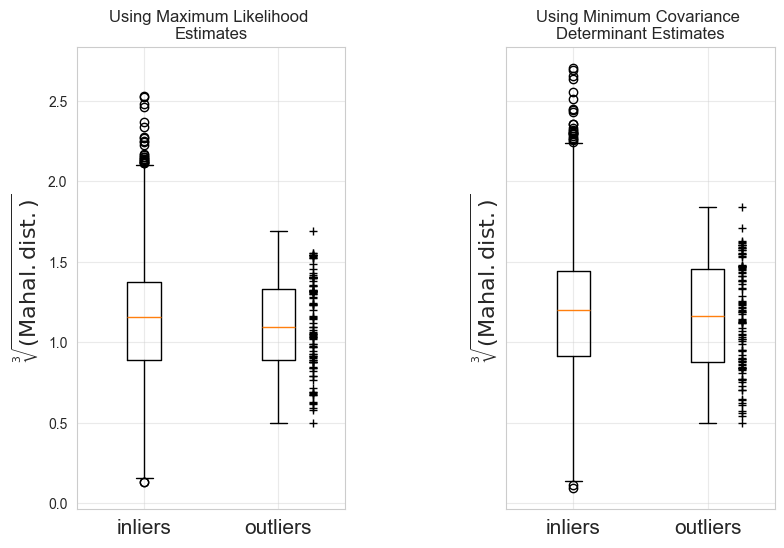

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (9, 6))
plt.subplots_adjust(wspace=0.6)

emp_mahal = empirical_cov.mahalanobis(new_df - np.mean(new_df, 0)) ** (1/3)

ax1.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=0.25)
ax1.plot(np.full(n_outliers, 2.26), emp_mahal[-n_outliers:], "+k", markeredgewidth=1)
ax1.set_xticklabels(["inliers", "outliers"], size=15)
ax1.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
ax1.set_title("Using Maximum Likelihood \nEstimates")
ax1.grid(alpha = .4)

robust_mahal = robust_cov.mahalanobis(new_df - robust_cov.location_) ** (1/3)
ax2.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]], widths=0.25)
ax2.plot(np.full(n_outliers, 2.26), robust_mahal[-n_outliers:], "+k", markeredgewidth=1)
ax2.set_xticklabels(["inliers", "outliers"], size=15)
ax2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
ax2.set_title("Using Minimum Covariance \nDeterminant Estimates")
ax2.grid(alpha = .4)

plt.show()

Between using non-robust and robust estimates, we observe the following:
1. Non-robust: In the inliers distribution, the median distance is lower and it has a tighter inter-quartile range (IQR), but exhibits some outliers. For the outliers distribution the overall distribution of distance seems to be higher but still has some overlap with the inliers distribution, meaning some outlier may be misclassified.
2. Robust: Between inliers and outliers distribution of distance is a more notable difference, meaning we are better able to distinguish the 2. This is the superiour method in this as well as most cases.

That being said, in detecting outliers using Mahalanobis distance with an elliptical boundary, the main presupposition is that our data follows a multivariate Gaussian distribution, meaning all feature vectors are independent of one another and follow a normal distribution. This is not the case for our dataset since no feature is normally distributed, leading to compromised results. This method is ineffective for this particular dataset.

### Local Outlier Factor

In [127]:
class LocalOutlierFactor:
    def __init__(self, n_neighbors, contamination):
        self.n_neighbors = n_neighbors
        self.contamination = contamination
        self.ano_scores_ = None
    
    def fit(self, X):
        self.neighbors_ = NearestNeighbors(n_neighbors=self.n_neighbors)
        self.neighbors_.fit(X)
        
        self.ano_scores_ = self._calculate_lof(X)
        
        return self

    def _calculate_lof(self, X):
        distances, indices = self.neighbors_.kneighbors(X)

        # LRD
        lrd = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            reach_dists = np.maximum(distances[i, :], distances[indices[i, :], :].mean(axis=1))
            lrd[i] = 1 / np.mean(reach_dists)

        # LOF score
        lof_scores = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            lof_scores[i] = np.mean(lrd[indices[i, :]] / lrd[i])

        return lof_scores

    def predict(self, X):
        if self.ano_scores_ is None:
            raise Exception("Model not fitted yet. Call 'fit' before 'predict'.")

        threshold = np.percentile(self.ano_scores_, 100 * (1 - 0.2))
        return (self.ano_scores_ > threshold).astype(int)

In [128]:
lof = LocalOutlierFactor(n_neighbors=100, contamination=0.15)
lof.fit(new_df)
predictions = lof.predict(new_df)
print("LOF Scores:", lof.ano_scores_)
print("Predictions (0: Inlier, 1: Outlier):", predictions)

LOF Scores: [0.98822457 1.01555087 1.01757538 ... 0.95876324 0.96312789 1.02119421]
Predictions (0: Inlier, 1: Outlier): [0 0 0 ... 0 0 0]


In [129]:
new_df.to_csv('new_df_lof.csv', index=False)

In [130]:
lof_df = pd.DataFrame({
    'PC1': new_df['PC1'],
    'PC2': new_df['PC2'],
    'Predictions': predictions
})
print(lof_df.head())

        PC1       PC2  Predictions
0  0.668870 -2.140876            0
1  1.961430  1.032648            0
2  1.956840  0.765640            0
3  1.480374  0.624832            0
4  1.667750  0.817204            0


In [131]:
outliers_lof_df = lof_df[lof_df['Predictions'] == 1]
outliers_lof_df.to_csv('outliers_lof.csv', index=False)

In [132]:
inliers_lof_df = lof_df[lof_df['Predictions'] == 0]
inliers_lof_df.to_csv('inliers_lof.csv', index=False)

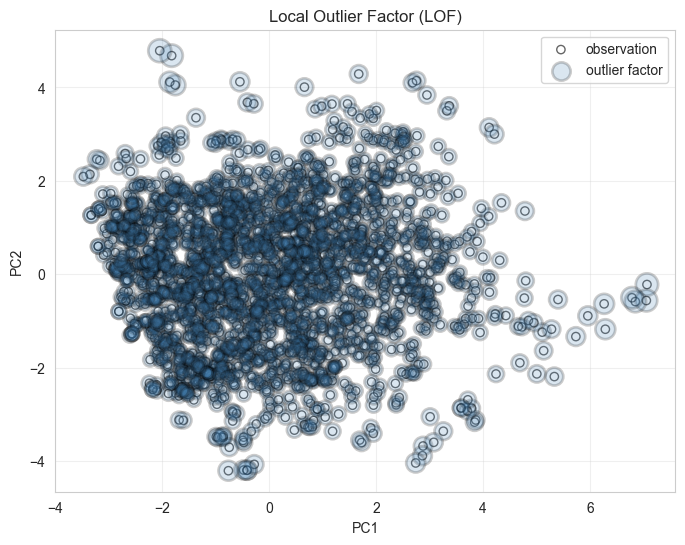

In [133]:
plt.figure(figsize=(8, 6))

plt.scatter(new_df['PC1'], new_df['PC2'], c = 'none', edgecolors='k', alpha = .6, label = 'observation')
plt.scatter(new_df['PC1'], new_df['PC2'], s=80 * lof.ano_scores_, edgecolors='k', facecolors="steelblue", alpha=0.2, linewidths= 2, label = 'outlier factor')
plt.legend()
plt.title('Local Outlier Factor (LOF)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha = .3)
plt.show()

LOF identifies outliers by comparing the density of data points in their local neighborhoods, rather than the entire dataset.
It uses the nearest neighbor search to identify the anomalous points. The advantage of using an LOF is identifying points that are outliers relative to a local cluster of points, so for datapoints that are very far away from the central cluster it is disregarded altogether.

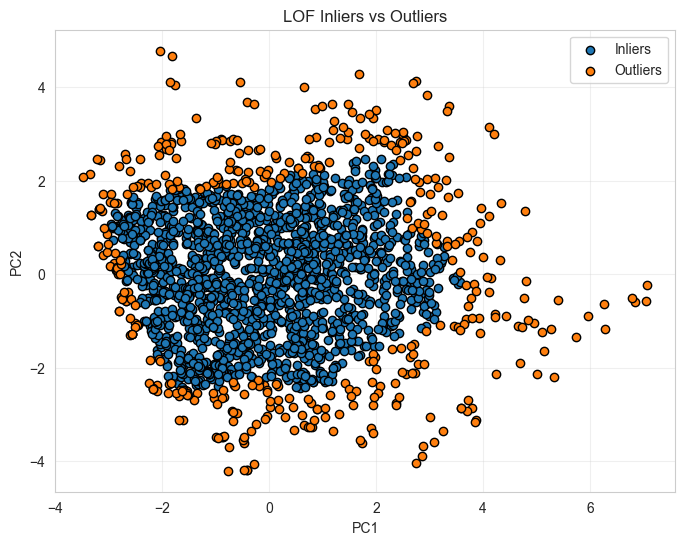

In [134]:
plt.figure(figsize = (8, 6))
plt.scatter(inliers_lof_df['PC1'], inliers_lof_df['PC2'], edgecolors='k', label='Inliers')
plt.scatter(outliers_lof_df['PC1'], outliers_lof_df['PC2'], edgecolors='k', label='Outliers')
plt.title('LOF Inliers vs Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha = .3)
plt.legend()

In [135]:
lof_scores = pd.DataFrame(lof.ano_scores_)

fig = px.histogram(data_frame=lof_scores, x=0, color_discrete_sequence=['#C19A6B'], nbins=50, title='LOF Score Histogram')

fig.update_layout(
    plot_bgcolor='white',  
    paper_bgcolor='white',
    xaxis=dict(gridcolor='lightgrey'), 
    yaxis=dict(gridcolor='lightgrey'),  
    barmode='overlay', 
    bargap=0.1 
)

fig.show()

### Isolation Forest model

In [136]:
clf = IsolationForest(random_state=42, bootstrap=True, verbose=1)
clf.fit(new_df)

IsolationForest(bootstrap=True, random_state=42, verbose=1)

In [137]:
x_min, x_max = new_df['PC1'].min() - 1,new_df['PC1'].max() + 1 
y_min, y_max = new_df['PC2'].min() - 1, new_df['PC2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_scores = clf.decision_function(grid_points).reshape(xx.shape)

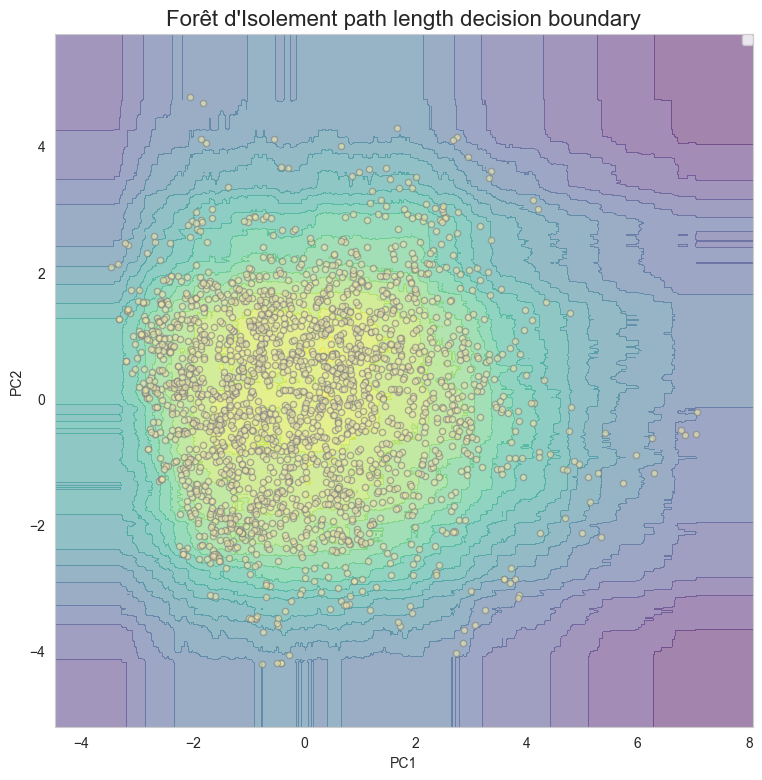

In [138]:
plt.figure(figsize = (9, 9))
plt.contourf(xx, yy, grid_scores, levels  = 20, cmap = 'viridis', alpha = .5)
scat = plt.scatter(new_df['PC1'], new_df['PC2'], label = 'datapoints', color = '#EEE8AA', edgecolor = 'grey', s = 20, alpha = .6)
handles, labels = scat.legend_elements()
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.xlim(plt.xlim()[0], 4.0)
plt.title('Forêt d\'Isolement path length decision boundary', fontsize = 16)
plt.grid(False)
plt.legend(
    handles,
    ['Inliers', 'Outliers'],
    loc="upper right",
    borderaxespad=0,
)

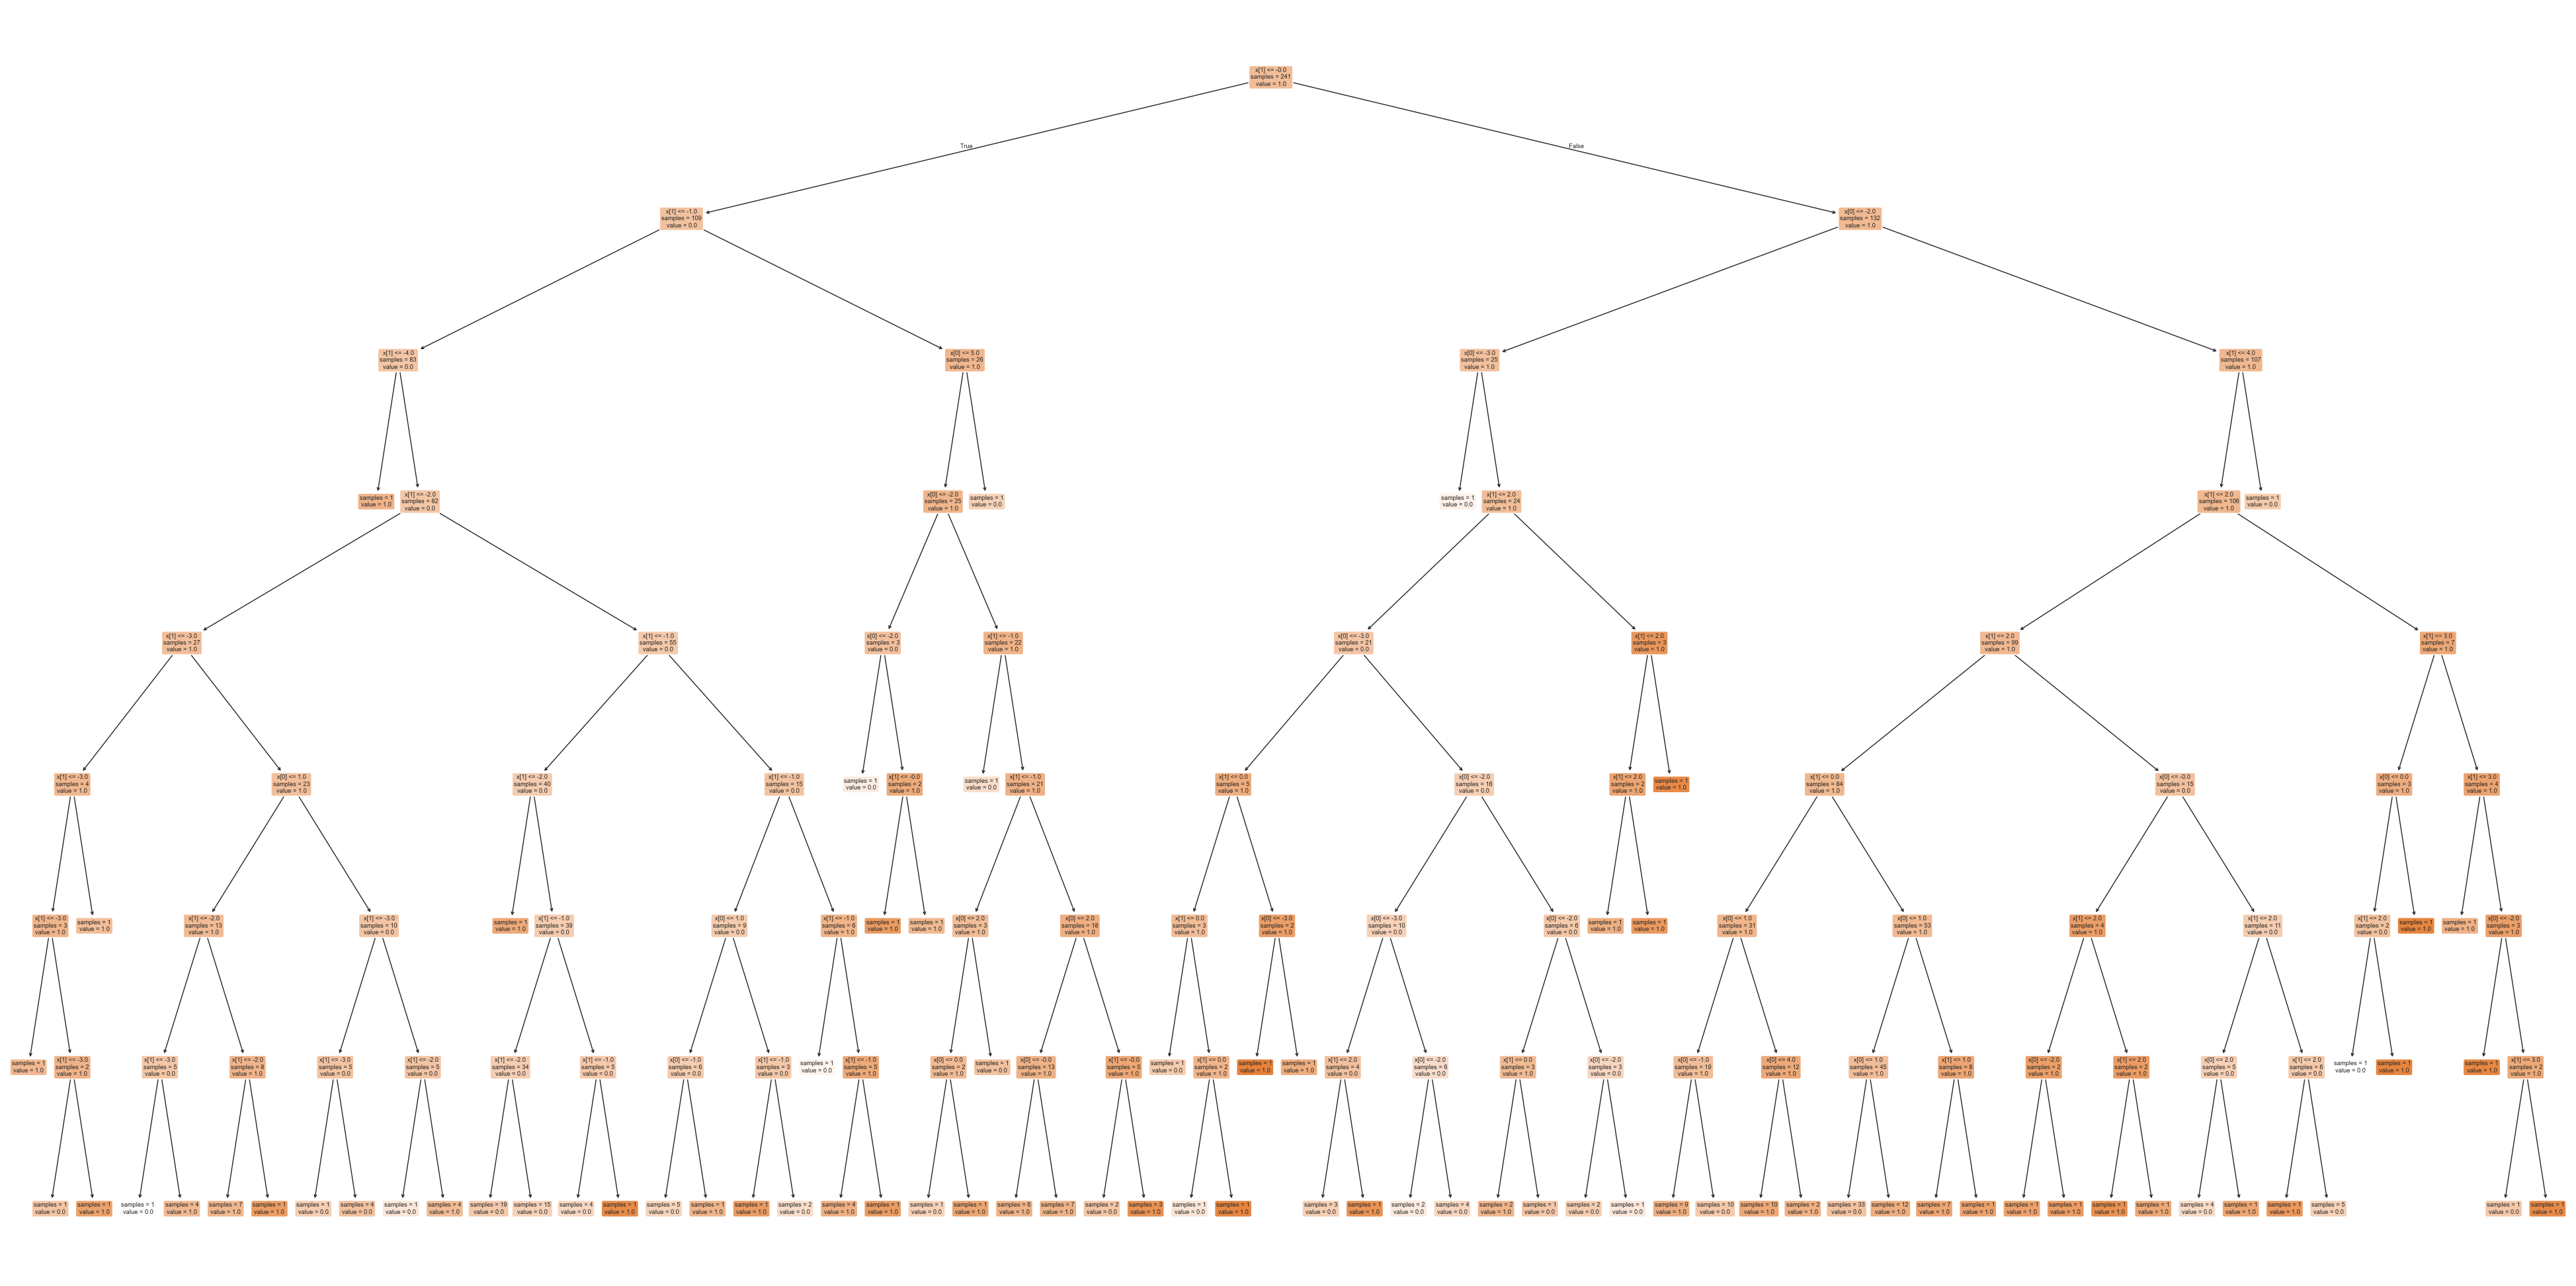

In [139]:
tree = clf.estimators_[0]
plt.figure(figsize=(50, 25))
plot_tree(tree, 
          filled=True,
          rounded=True, 
          max_depth=8,
          impurity=False,
          node_ids=False,
          precision=0)
plt.show()

Leaves that are cut off early in each branch of the regressor tree correspond to an outlier we're able to detect.

In [140]:
outliers_clf = clf.predict(new_df)
outliers_clf_df = new_df[outliers_clf == -1]
outliers_clf_df.loc[:, 'Predictions'] = 1  

In [141]:
inliers_clf = clf.predict(new_df)
inliers_clf_df = new_df[inliers_clf == 1]
inliers_clf_df.loc[:, 'Predictions'] = 0  

In [142]:
clf_pred = clf.predict(new_df)
transformed_labels = [1 if label == -1 else 0 for label in clf_pred]
iforest_df = new_df.copy()
iforest_df['Prediction'] = transformed_labels
iforest_df

PC1       PC2  Prediction
0     0.668870 -2.140876           0
1     1.961430  1.032648           0
2     1.956840  0.765640           0
3     1.480374  0.624832           0
4     1.667750  0.817204           0
...        ...       ...         ...
2121 -1.542754  0.666319           0
2122 -0.734911  1.087450           0
2123 -0.704925  1.149336           0
2124 -0.775917  1.111703           0
2125 -1.301396  0.169333           0

[2126 rows x 3 columns]

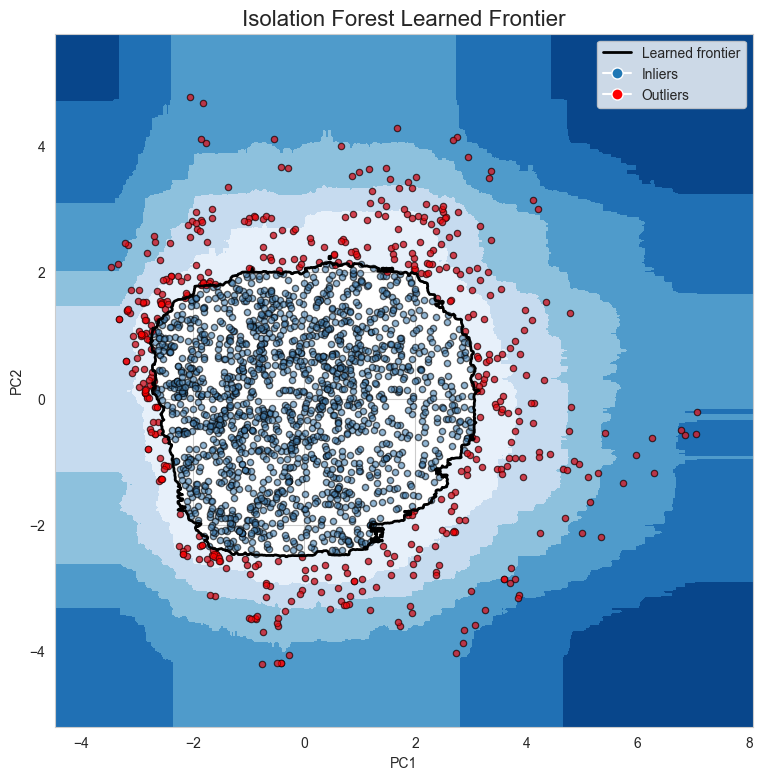

In [143]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = clf.decision_function(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 9))
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, levels=np.linspace(Z.min(), 0, 7))
contour = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(new_df['PC1'], new_df['PC2'], edgecolor='k', s=20, color = 'steelblue', alpha = .6)
outlier = sns.scatterplot(x=outliers_clf_df['PC1'], y=outliers_clf_df['PC2'], color='r', edgecolor='k', label='Outlier', s=20, alpha = .6)

plt.title("Isolation Forest Learned Frontier", fontsize = 16)
decision_boundary_legend = Line2D([0], [0], color='k', lw=2, label='Learned frontier')
inliers_legend = Line2D([0], [0], marker='o', color='w', markerfacecolor='#1f77b4', markersize=8, label='Inliers')
outliers_legend = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Outliers')

plt.legend(handles=[decision_boundary_legend, inliers_legend, outliers_legend])
plt.show()

### One-Class SVM with Stoch Gradient Descent

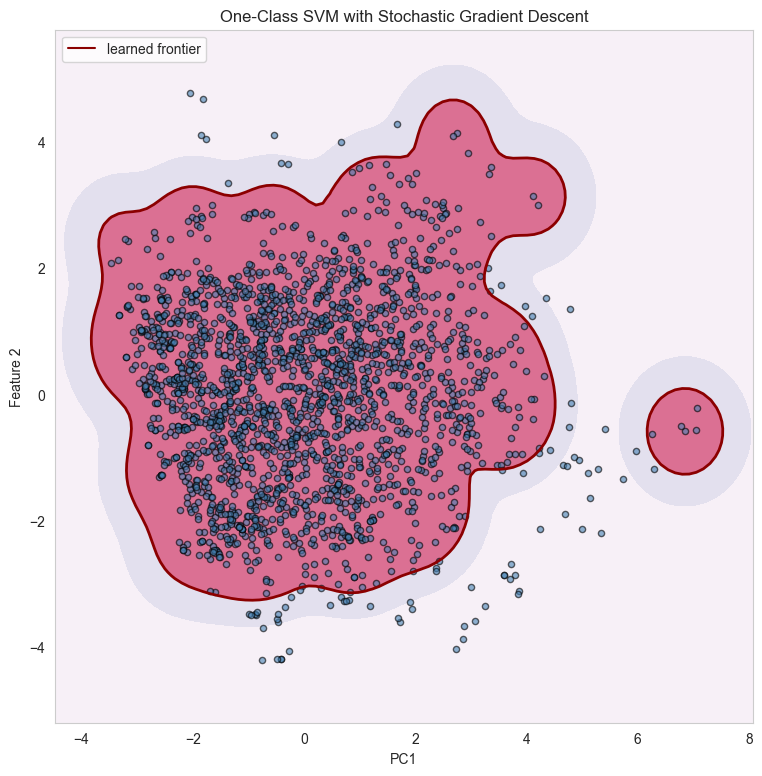

In [145]:
transform = Nystroem(gamma=2, random_state=42)
clf_sgd = SGDOneClassSVM(
    nu=0.05, shuffle=True, fit_intercept=True, random_state=42, tol=1e-4
)
pipe_sgd = make_pipeline(transform, clf_sgd)
pipe_sgd.fit(new_df)
y_pred = pipe_sgd.predict(new_df)

_, ax = plt.subplots(figsize=(9, 9))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    new_df,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="PuBu",
)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    new_df,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,
    linewidths=2,
    colors="darkred",
    levels=[0],
)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    new_df,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    colors="palevioletred",
    levels=[0, pipe_sgd.decision_function(new_df).max()],
)

ax.scatter(new_df['PC1'], new_df["PC2"], color="steelblue", edgecolors='k', label="inliers", s =20, alpha = .6)

ax.set(
    title = r"One-Class SVM with Stochastic Gradient Descent",
    ylabel = ('Feature 2')
)
ax.legend(
    [mlines.Line2D([], [], color="darkred", label="learned frontier")],
    [
        "learned frontier"
    ],
    loc="upper left",
)
plt.grid(alpha = .3)
plt.show()

For one class SVM, if one were to train it on all the data, the model detects the outliers as the same class as inliers and thus become unable to adapt to the inlier patterns. Thus, we need to train it on only the inliers, which since our data does not have labels for we have to rely on the prediction of Isolation Forest.

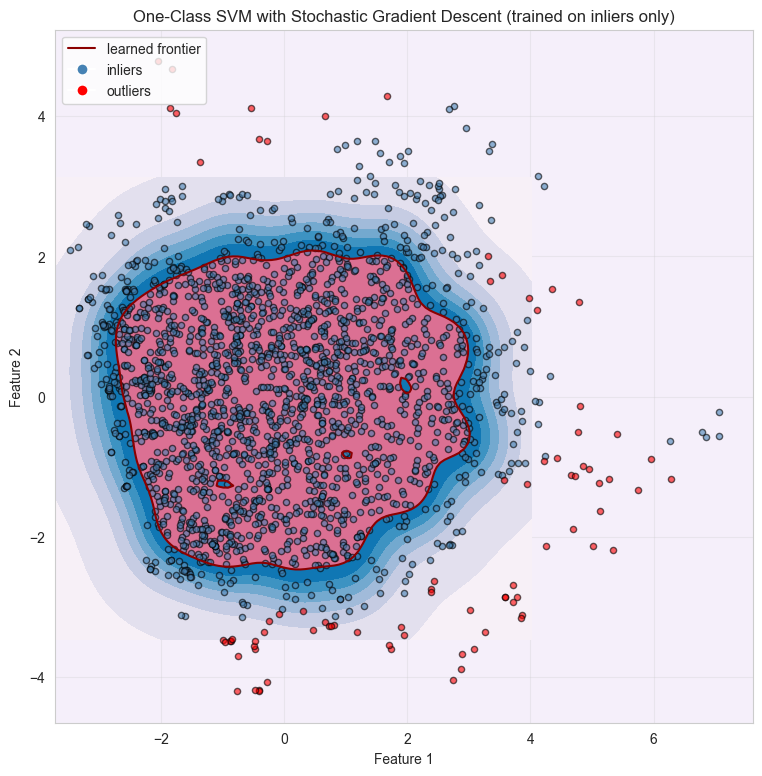

In [147]:
inliers_clf_df2 = inliers_clf_df.drop('Predictions', axis=1)
outliers_clf_df2 = outliers_clf_df.drop('Predictions', axis=1)
transform = Nystroem(gamma=2, random_state=42)
clf_sgd = SGDOneClassSVM(
    nu=0.05, shuffle=True, fit_intercept=True, random_state=42, tol=1e-4
)
pipe_sgd = make_pipeline(transform, clf_sgd)
pipe_sgd.fit(inliers_clf_df2)
y_pred = pipe_sgd.predict(inliers_clf_df2)

_, ax = plt.subplots(figsize=(9, 9))

xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    inliers_clf_df2,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="PuBu"
)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    inliers_clf_df2,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,
    liinlieridths=2,
    colors="darkred",
    levels=[0],
)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    inliers_clf_df2,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    colors="palevioletred",
    levels=[0, pipe_sgd.decision_function(inliers_clf_df2).max()],
)
ax.scatter(inliers_svm_df['PC1'], inliers_svm_df["PC2"], color="steelblue", edgecolors='k', label="inliers", s =20, alpha = .6)
ax.scatter(outliers_svm_df['PC1'], outliers_svm_df["PC2"], color="red", edgecolors='k', label="outliers",s = 20, alpha = .6) 
ax.set(
    title=r"One-Class SVM with Stochastic Gradient Descent (trained on inliers only)",
    xlabel=('Feature 1'),
    ylabel = ('Feature 2')
)
inliers_legend = Line2D([0], [0], marker='o', color='w', markerfacecolor='steelblue', markersize=8, label='Inliers')
outliers_legend = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Outliers')
ax.legend(
    [mlines.Line2D([], [], color="darkred", label="learned frontier"),inliers_legend, outliers_legend],  
    [
        "learned frontier", 'inliers', 'outliers'
    ],
    loc="upper left",
)
plt.grid(alpha = .3)
plt.gca().set_facecolor("#F5EFFA")
plt.show()

In [146]:
y_pred_inliers = pipe_sgd.predict(new_df)
inliers_svm = new_df[y_pred_inliers == 1]  
outliers_svm = new_df[y_pred_inliers == -1]
inliers_svm_df = pd.DataFrame(inliers_svm)
outliers_svm_df = pd.DataFrame(outliers_svm)
inliers_svm_df.loc[:, 'Predictions'] = 0  
outliers_svm_df.loc[:, 'Predictions'] = 1  
inliers_svm_df.to_csv('inlier_svm.csv', index=False)
outliers_svm_df.to_csv('outlier_svm.csv', index=False)

In [148]:
print(inliers_svm.shape)
print(outliers_svm.shape)
print(y_pred_inliers.shape)

(2044, 2)
(82, 2)
(2126,)


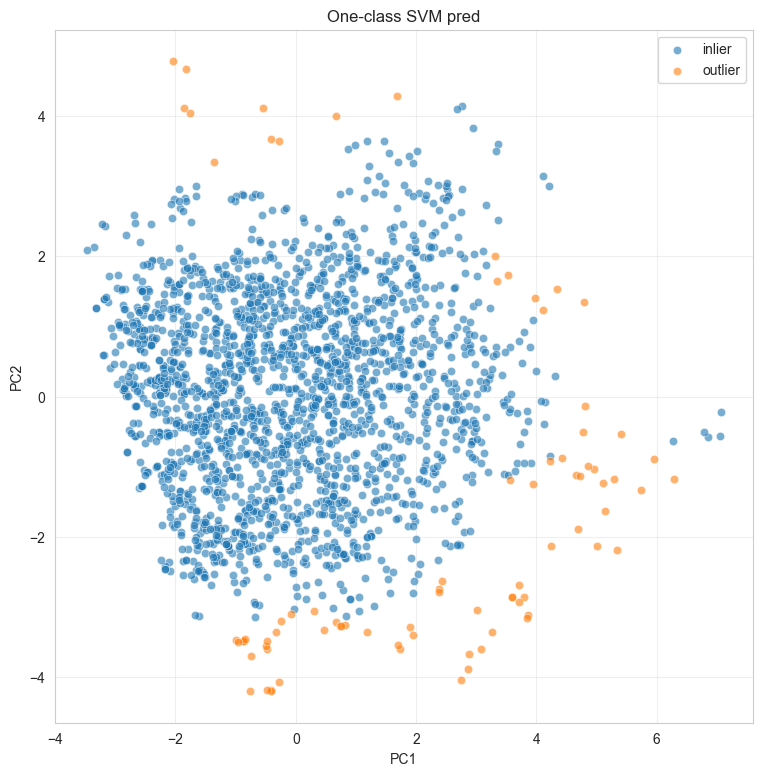

In [149]:
plt.figure(figsize = (9, 9))
sns.scatterplot(x='PC1', y='PC2', data=inliers_svm_df, label='inlier', alpha = .6)
sns.scatterplot(x='PC1', y='PC2', data=outliers_svm_df, label='outlier', alpha = .6)
plt.title('One-class SVM pred')
plt.grid(alpha = .3)

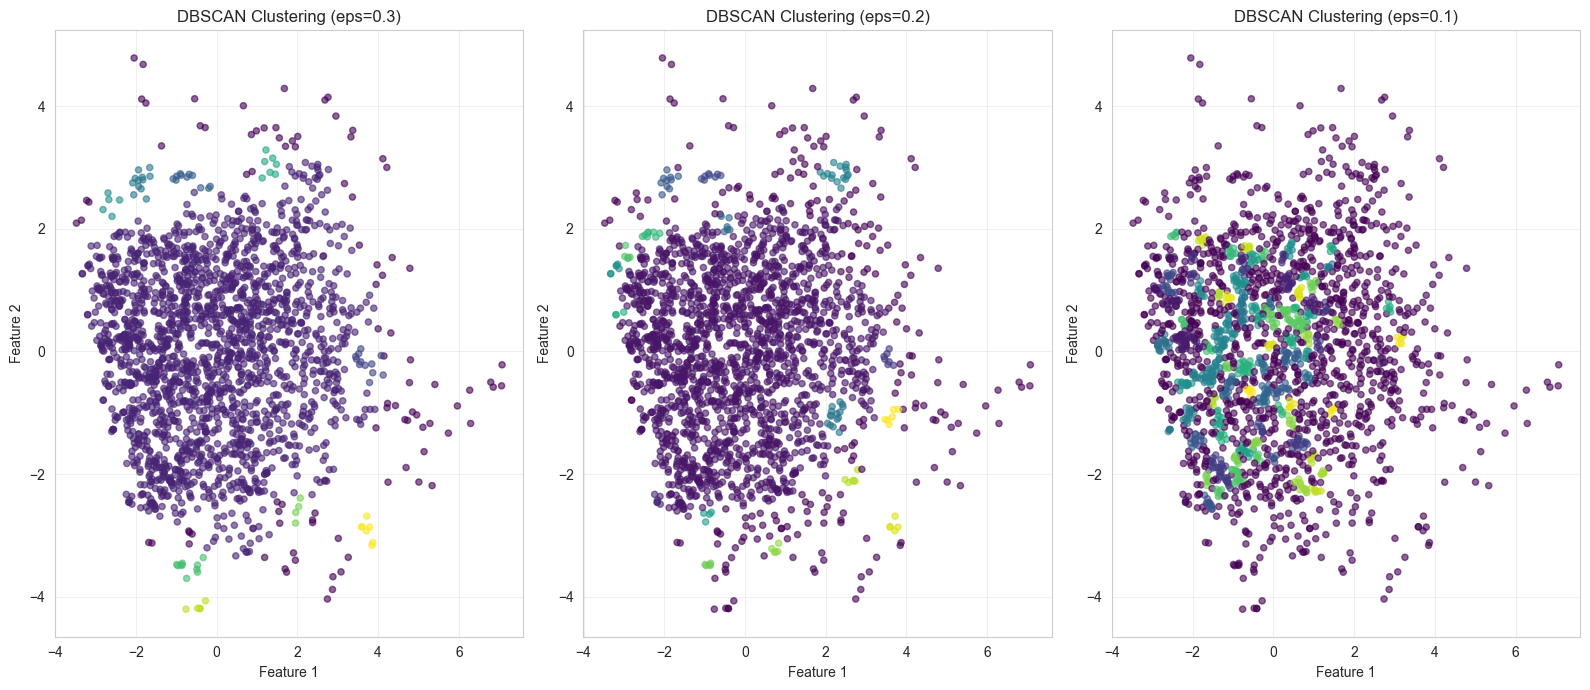

In [150]:
eps_values = [0.3, 0.2, 0.1]

fig = plt.figure(figsize=(16, 7))

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5).fit(new_df)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    #print("Estimated number of clusters: %d" % n_clusters_)
    #print("Estimated number of noise points: %d" % n_noise_)
    clusters = dbscan.fit_predict(new_df)
    ax = fig.add_subplot(1, len(eps_values), i + 1)
    scatter = ax.scatter(new_df['PC1'], new_df['PC2'], c=clusters, cmap='viridis', s=20, alpha = .6)

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'DBSCAN Clustering (eps={eps})')

    norm = Normalize(vmin=np.min(clusters), vmax=np.max(clusters))
    sm = ScalarMappable(norm=norm, cmap='viridis')
    sm.set_array([])

    handles = []
    labels = np.unique(clusters)
    for cluster_label in labels:
        if cluster_label == -1:
            label = 'Noise'
        else:
            label = f'Cluster {cluster_label}'
        handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sm.to_rgba(cluster_label), markersize=10, label=label))

    ax.grid(alpha=0.3)
    #ax.legend(handles=handles, loc='upper right', fontsize='large')

plt.tight_layout()
plt.show()

DBSCAN's ability to detect outliers is sensitive to the hyperparameter epsilon which dictates the neighbourhood distance. Therefore to have an effective DBSCAN model, it would mostly rely on 1. domain knowledge, 2. testing model effectiveness with Silhouette or Inertia. This method is therefore very subjective. 

In [151]:
print(f"Number of iForest inliers: {inliers_clf_df.shape[0]}\nNumber of iForest outliers: {outliers_clf_df.shape[0]}\nNumber of lof inliers: {inliers_lof_df.shape[0]}\nNumber of lof outliers: {outliers_lof_df.shape[0]}\nNumber of svm inliers: {inliers_svm_df.shape[0]}\nNumber of svm outliers: {outliers_svm_df.shape[0]}\n")

Number of iForest inliers: 1643
Number of iForest outliers: 483
Number of lof inliers: 1701
Number of lof outliers: 425
Number of svm inliers: 2044
Number of svm outliers: 82



In [152]:
lof_df = pd.concat([inliers_lof_df, outliers_lof_df])
lof_df = lof_df.sort_values(by=[lof_df.columns[0], lof_df.columns[1]])  # Sorting by first and second columns
lof_df.to_csv('lof.csv', index=False)

clf_df = pd.concat([inliers_clf_df, outliers_clf_df])   
clf_df = clf_df.sort_values(by=[clf_df.columns[0], clf_df.columns[1]])  # Sorting by first and second columns
clf_df.to_csv('clf.csv', index=False)

svm_df = pd.concat([inliers_svm_df, outliers_svm_df])
svm_df = svm_df.sort_values(by=[svm_df.columns[0], svm_df.columns[1]])  # Sorting by first and second columns
svm_df.to_csv('svm.csv', index=False)

new_df = new_df.sort_values(by=[new_df.columns[0], new_df.columns[1]])
new_df.to_csv('new_df.csv', index=False)

In [153]:
if lof_df.shape == clf_df.shape == svm_df.shape:
    print("All dataframes have same shape")
else:
    print(lof_df.shape, clf_df.shape, svm_df.shape)

All dataframes have same shape


In [154]:
results = pd.DataFrame({
    'PC1': new_df['PC1'],
    'PC2': new_df['PC2'],
    'LOF Predictions': lof_df['Predictions'],  
    'CLF Predictions': clf_df['Predictions'],  
    'SVM Predictions': svm_df['Predictions']  
})

results.to_csv('results.csv', index=False)

### Combining prediction

In [155]:
pred_1 = results["LOF Predictions"]
pred_2 = results["CLF Predictions"]
pred_3 = results["SVM Predictions"]

from scipy.stats import mode
combined_preds = np.stack((pred_1, pred_2, pred_3), axis=1)
voting_ensembled, rand = mode(combined_preds, axis = 1)
voting_ensembled = np.squeeze(voting_ensembled)

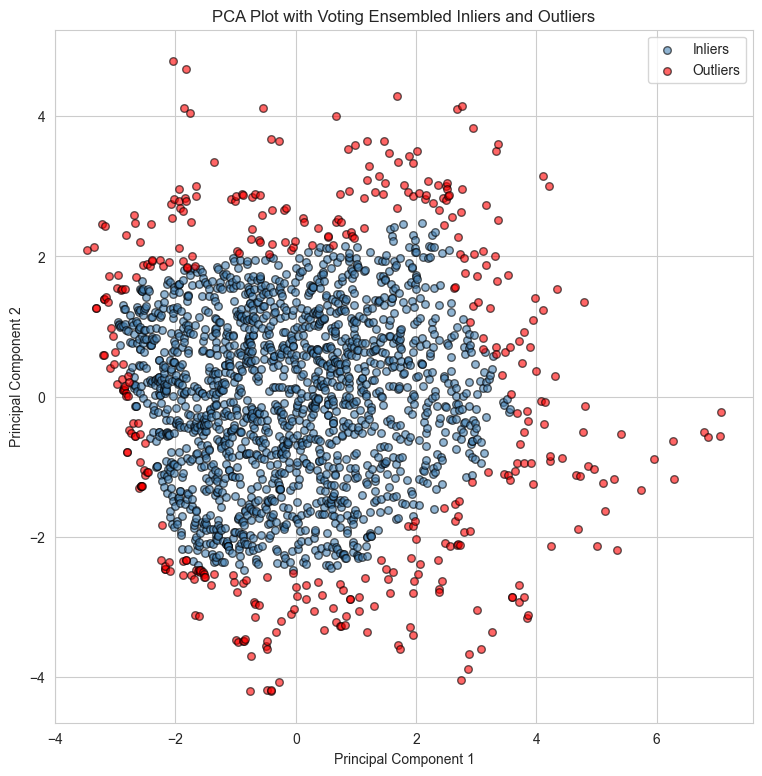

In [156]:
plt.figure(figsize=(9, 9))

plt.scatter(new_df['PC1'][voting_ensembled == 0], new_df['PC2'][voting_ensembled == 0], 
            c='steelblue', edgecolor='k', s=30, label='Inliers', alpha = .6)

plt.scatter(new_df['PC1'][voting_ensembled == 1], new_df['PC2'][voting_ensembled == 1], 
            c='red', edgecolor='k', s=30, label='Outliers', alpha = .6)

plt.title('PCA Plot with Voting Ensembled Inliers and Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## Results of clustering based approaches

In [157]:
svm_pred_df = pd.concat([inliers_svm_df, outliers_svm_df], ignore_index=True)

In [158]:
ensembled_df = new_df.copy()
ensembled_df['Predictions'] = voting_ensembled

In [159]:
from sklearn.metrics import silhouette_score
silhouette_score_lof = silhouette_score(lof_df[['PC1', 'PC2']], labels=lof_df['Predictions'])
silhouette_score_iforest = silhouette_score(iforest_df[['PC1', 'PC2']], labels=iforest_df['Prediction'])
silhouette_score_svm = silhouette_score(svm_pred_df[['PC1', 'PC2']], svm_pred_df['Predictions'])
silhouette_score_ensembled = silhouette_score(ensembled_df[['PC1', 'PC2']], ensembled_df['Predictions'])


print("Silhouette Score for Local Outlier Factor: {:.4f}".format(silhouette_score_lof))
print("Silhouette Score for Isolation Forest: {:.4f}".format(silhouette_score_iforest))
print("Silhouette Score for SVM predictions: {:.4f}".format(silhouette_score_svm))
print("Silhouette Score for Ensembled Predictions: {:.4f}".format(silhouette_score_ensembled))


Silhouette Score for Local Outlier Factor: 0.2538
Silhouette Score for Isolation Forest: 0.2528
Silhouette Score for SVM predictions: 0.3832
Silhouette Score for Ensembled Predictions: 0.2699


In [160]:
silhouette_scores = pd.DataFrame({
    'Model': ['LOF', 'Isolation Forest', 'SVM', 'Ensembled'],
    'Silhouette Score': [silhouette_score_lof, silhouette_score_iforest, silhouette_score_svm, silhouette_score_ensembled]
})
silhouette_scores['Model'] = silhouette_scores['Model'].astype(str)
silhouette_scores['Silhouette Score'] = silhouette_scores['Silhouette Score'].astype(float)

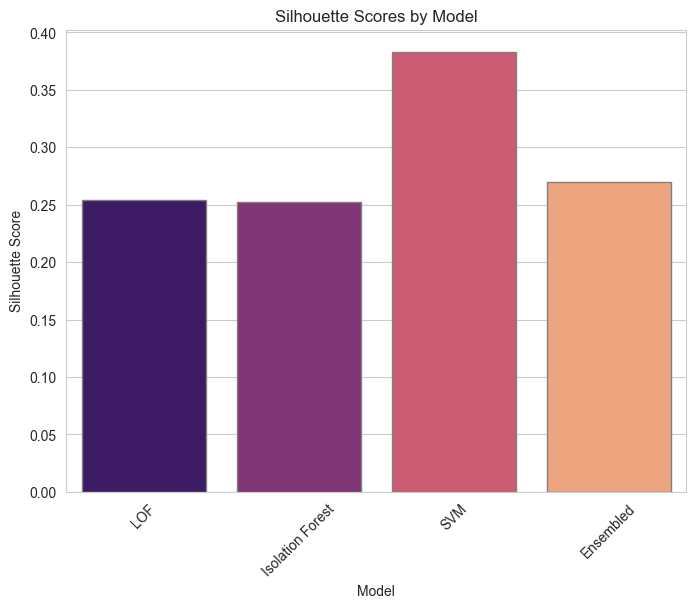

In [161]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

bar_plot = sns.barplot(x='Model', y='Silhouette Score', data=silhouette_scores, palette='magma')

for bar in bar_plot.patches:
    bar.set_edgecolor('gray')
plt.xlabel('Model')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores by Model')
plt.xticks(rotation = 45)

plt.show()


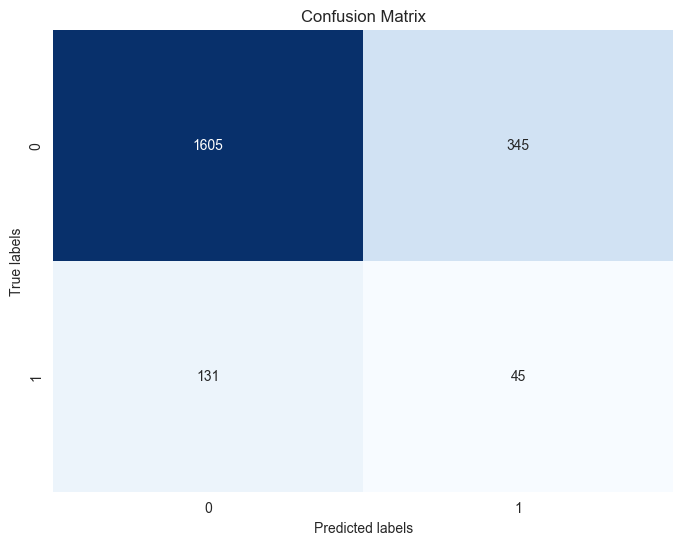


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1950
           1       0.12      0.26      0.16       176

    accuracy                           0.78      2126
   macro avg       0.52      0.54      0.51      2126
weighted avg       0.86      0.78      0.81      2126



In [162]:
y = y1['NSP']
y_mapped = np.where(np.isin(y, [1, 2]), 0, 1)

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_report = classification_report(y_mapped, voting_ensembled)

conf_matrix = confusion_matrix(y_mapped, voting_ensembled)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(class_report)

In [165]:
voting_ensembled

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [164]:
y = y1['NSP']
y_mapped = np.where(np.isin(y, [1, 2]), 0, 1)

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_report = classification_report(y_mapped, voting_ensembled)

conf_matrix = confusion_matrix(y_mapped, voting_ensembled)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(class_report)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets